# **New York City Yellow Taxi Data**

### *Author: Ejaz Qayyum Ansari*

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings



In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.2
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:

# Select the folder having data files
import os

# Try loading one file
os.chdir(os.path.dirname(os.path.abspath("__file__")))

df = pd.read_parquet('../trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Group by (date, hour) and sample
grouped = df.groupby([df['tpep_pickup_datetime'].dt.date,
                              df['tpep_pickup_datetime'].dt.hour])
sampled_data = pd.concat(
    [group.sample(frac=0.05, random_state=42) for _, group in grouped],
    ignore_index=True
)

sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152087 entries, 0 to 152086
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152087 non-null  int64         
 1   tpep_pickup_datetime   152087 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152087 non-null  datetime64[us]
 3   passenger_count        148483 non-null  float64       
 4   trip_distance          152087 non-null  float64       
 5   RatecodeID             148483 non-null  float64       
 6   store_and_fwd_flag     148483 non-null  object        
 7   PULocationID           152087 non-null  int64         
 8   DOLocationID           152087 non-null  int64         
 9   payment_type           152087 non-null  int64         
 10  fare_amount            152087 non-null  float64       
 11  extra                  152087 non-null  float64       
 12  mta_tax                152087 non-null  floa

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour > groupby: append sampled data -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
os.chdir('../trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)

        # convert the pickup datetime column to datetime format
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])

        # Instead of for loop to iterate through the dates and hours, we can use groupby to group the data by date and hour
        # And then sample the data for each group

        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

        # group by (date, hour)
        grouped = monthly_df.groupby(['pickup_date', 'pickup_hour'])

        # Sample 5% of the data for each (hour, date) combination
        sampled_data = pd.concat(
            [group.sample(frac=0.05, random_state=42) for _, group in grouped],
            ignore_index=True
        )
        
        # Append the sampled data to the main dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in parquet
# current directory is trip_records - avoid overwriting the files in the same folder
filepath = '../5-percent-sampled-df.parquet'
if not os.path.isfile(filepath):
    df.to_parquet(filepath)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
# Load the new data file

df = pd.read_parquet(filepath)

In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             2  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Since we used ignore_index=True while concatenating, the index is already reset
print(df.index)

# Drop the unnecessary columns
# store_and_fwd_flag is not needed for our analysis
# It is a flag to indicate whether the trip was stored and forwarded (meaning the data was collected later on while the vehicle was offline)
df.drop(columns=['store_and_fwd_flag'], inplace=True)

df.describe()

RangeIndex(start=0, stop=1896400, step=1)


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831526e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.369215e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.927560e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00  4.952796e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00  4.885128e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.989706e-01  2.898186e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           3.112072e-02  1.064162e+02   

       congestion_surcharge    airport_fee   pickup_hour   Airport_fee  
count          1.831526e+06  148483.000000  1.896400e+06  1.683043e+06  
mean           2.307524e+00       0.109036  1.426504e+01  1.458850e-01  
min           -2.500000e+00      -1.250000  0.000000e+00 -1.750000e+00  
25%            2.500000e+00       0.000000  1.100000e+01  0.000000e+00  
50%            2.500000e+00       0.000000  1.500000e+01  0.000000e+00  
75%            2.500000e+00       0.000000  1.900000e+01  0.000000e+00  
max            2.500000e+00       1.250000  2.300000e+01  1.750000e+00  
std            6.667267e-01       0.352744  5.807381e+00  4.733757e-01

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns

# Combine the columns by filling missing values from 'airport_fee' into 'Airport_fee'
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

# Drop the 'airport_fee' column
df.drop(columns=['airport_fee'], inplace=True)

# Check the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_date            object        
 18  pickup_hour           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative

negative_fares = df[df['fare_amount'] < 0] 

negative_fares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               0 non-null      int64         
 1   tpep_pickup_datetime   0 non-null      datetime64[us]
 2   tpep_dropoff_datetime  0 non-null      datetime64[us]
 3   passenger_count        0 non-null      float64       
 4   trip_distance          0 non-null      float64       
 5   RatecodeID             0 non-null      float64       
 6   PULocationID           0 non-null      int64         
 7   DOLocationID           0 non-null      int64         
 8   payment_type           0 non-null      int64         
 9   fare_amount            0 non-null      float64       
 10  extra                  0 non-null      float64       
 11  mta_tax                0 non-null      float64       
 12  tip_amount             0 non-null      float64       
 13  tolls_amount          

Did you notice something different in the `RatecodeID` column for above records?

In [14]:
# Analyse RatecodeID for the negative fare amounts

negative_fares['RatecodeID'].value_counts(dropna=False, normalize=True)

Series([], Name: proportion, dtype: float64)

- The data type of the `RatecodeID` column is float64 which is quite concerning because this column contains the catogarial data id of rate code types.
- There is no data in the negative fare amount dataframe and `RatecodeID` can not be analysed

In [15]:
# Find which columns have negative values

# Check for negative values in numeric columns
negative_columns = df.select_dtypes(include=['float64', 'int64']).lt(0).any()
columns_with_negatives = negative_columns[negative_columns].index.tolist()

columns_with_negatives

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

We have found following columns which has negative values.

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

There are 2 types of these columns that have negative values

- Type 1 : **mta_tax, improvement_surcharge, congestion_surcharge, Airport_fee, extra**: These are fixed charges or surcharges. Negative values for these columns likely indicate data issues, as these amounts should always be positive.

- Type 2 : **total_amount**: This represents the total fare charged to the passenger, which should also always be positive. Negative values here likely indicate issues with the fare calculation or data entry.

In [16]:
# Analyse the negative values in the type 1 columns
print(df['mta_tax'].value_counts())
print(df['improvement_surcharge'].value_counts())
print(df['congestion_surcharge'].value_counts())
print(df['Airport_fee'].value_counts())
print(df['extra'].value_counts())

mta_tax
 0.50    1878456
 0.00      17797
-0.50         73
 0.80         52
 0.05         17
 4.00          2
 0.30          1
 3.50          1
 2.50          1
Name: count, dtype: int64
improvement_surcharge
 1.0    1894141
 0.3       1283
 0.0        898
-1.0         78
Name: count, dtype: int64
congestion_surcharge
 2.5    1690572
 0.0     140897
-2.5         56
 0.5          1
Name: count, dtype: int64
Airport_fee
 0.00    1670564
 1.75     121123
 1.25      39823
-1.75         11
-1.25          4
 1.00          1
Name: count, dtype: int64
extra
 0.00     756816
 2.50     466513
 1.00     363923
 5.00     134302
 3.50     107345
 7.50      16269
 6.00      15523
 4.25       6382
 9.25       6351
 1.75       3346
 3.75       2616
 6.75       2416
 2.75       2218
 8.75       2132
 10.25      1692
 7.75       1463
 1.25       1418
 11.75      1332
 2.25        894
 6.25        826
 10.00       567
 9.75        549
 7.25        481
 11.25       411
 8.50        369
 3.20         43
 3

As we can see, the negative values are similar to the positive ones. It seems to be a data issue, and they can likely be converted to positive without any problem.

In [17]:
# select the columns with negative values except for total_amount
type1_cols = selected_cols = [col for col in columns_with_negatives if col != 'total_amount']

# and apply the absolute value to the negative values
df[type1_cols] = df[type1_cols].apply(lambda col: np.where(col < 0, -col, col))

`total_amount` is nothing but the sum of monetary columns, lets calculate for these negative records only.

In [18]:
# Fix the negative values in the type 2 columns

monetary_columns = [
    'improvement_surcharge', 
    'tolls_amount', 
    'extra', 
    'mta_tax', 
    'tip_amount', 
    'congestion_surcharge', 
    'Airport_fee',
    'fare_amount'
]

filtered_df = df[df['total_amount'] < 0]

df.loc[filtered_df.index, 'total_amount'] = df.loc[filtered_df.index, monetary_columns].sum(axis=1)

In [19]:

#  check the negative values in the total_amount column again to verify the fix
df['total_amount'][df['total_amount'] < 0].head(10)

Series([], Name: total_amount, dtype: float64)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column

df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
pickup_date              0.000000
pickup_hour              0.000000
Airport_fee              0.034209
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

#### Handle missing values in 'passenger_count'

In [21]:
# Display the rows with null values
df[df['passenger_count'].isnull()].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
44         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
47         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5           19.24         NaN            66           107             0   
16          10.77         NaN           151           106             0   
43           4.52         NaN           114           262             0   
44           9.19         NaN           239           256             0   
47           2.74         NaN            90            48             0   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5         25.64    0.0      0.5        5.93          0.00   
16        45.38    0.0      0.5       11.19          6.55   
43        25.38    0.0      0.5        0.00          0.00   
44        40.00    0.0      0.5        2.20          0.00   
47        18.48    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
5                     1.0         35.57                   NaN  2023-01-01   
16                    1.0         67.12                   NaN  2023-01-01   
43                    1.0         29.38                   NaN  2023-01-01   
44                    1.0         46.20                   NaN  2023-01-01   
47                    1.0         25.85                   NaN  2023-01-01   

    pickup_hour  Airport_fee  
5             0          NaN  
16            0          NaN  
43            0          NaN  
44            0          NaN  
47            0          NaN

##### Fix the missing values in 'passenger_count'

In [22]:
df['passenger_count'].describe()

count    1.831526e+06
mean     1.369215e+00
std      8.927560e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

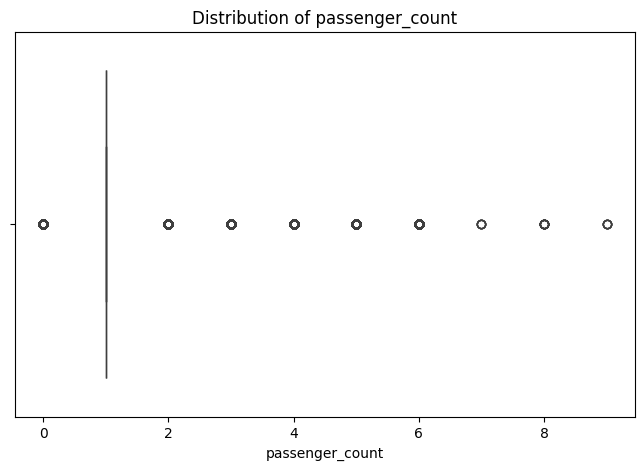

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['passenger_count'])
plt.title('Distribution of passenger_count')
plt.show()

Impute NaN values in 'passenger_count'

- Most values are 1 (25%, 50%, 75% are all 1).
- mean > median → there's a right skew (some high outliers like 9).
- min is 0, which is invalid

Based on the above insight the median is the best choice for imputing NaN values in 'passenger_count'

In [24]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\431810778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [25]:
zero_rows = df[df['passenger_count'] == 0]
num_zero_rows = zero_rows.shape[0]
print(f"Number of rows with passenger_count 0: {num_zero_rows} of total {df.shape[0]} rows")

Number of rows with passenger_count 0: 29681 of total 1896400 rows


Since 5824 rows out of 379268 is a relatively small fraction (about 1.5%), removing them would not impact the overall dataset significantly. Additionally, it ensures we have meaningful and realistic data remains.

In [26]:
df = df[df['passenger_count'] != 0]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

#### Handle missing values in 'RatecodeID'

In [27]:
# Display the rows with null values
df[df['RatecodeID'].isnull()].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
43         2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
44         2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
47         2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5           19.24         NaN            66           107             0   
16          10.77         NaN           151           106             0   
43           4.52         NaN           114           262             0   
44           9.19         NaN           239           256             0   
47           2.74         NaN            90            48             0   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5         25.64    0.0      0.5        5.93          0.00   
16        45.38    0.0      0.5       11.19          6.55   
43        25.38    0.0      0.5        0.00          0.00   
44        40.00    0.0      0.5        2.20          0.00   
47        18.48    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
5                     1.0         35.57                   NaN  2023-01-01   
16                    1.0         67.12                   NaN  2023-01-01   
43                    1.0         29.38                   NaN  2023-01-01   
44                    1.0         46.20                   NaN  2023-01-01   
47                    1.0         25.85                   NaN  2023-01-01   

    pickup_hour  Airport_fee  
5             0          NaN  
16            0          NaN  
43            0          NaN  
44            0          NaN  
47            0          NaN

##### Fix missing values in 'RatecodeID'

In [28]:
df['RatecodeID'].describe()

count    1.801845e+06
mean     1.642177e+00
std      7.441661e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

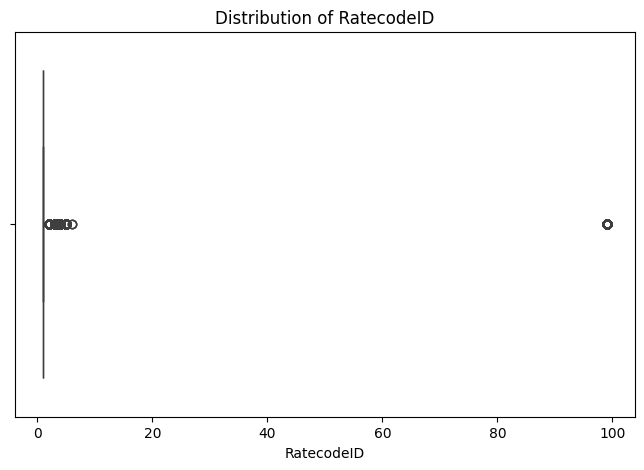

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['RatecodeID'])
plt.title('Distribution of RatecodeID')
plt.show()

Impute NaN values in 'RatecodeID'

- Most values are 1 (25%, 50%, 75% are all 1).
- mean > median → there's a right skew (some high outliers like 99).
- The default value is 1 

Based on the above insight the standard rate (1) which is also median, is the best choice for imputing NaN values in 'RatecodeID'

In [30]:
df['RatecodeID'].fillna(1.0, inplace=True)

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\664454592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1.0, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

#### Impute NaN in `congestion_surcharge`

In [31]:
df[df['congestion_surcharge'].isnull()].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
43         2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
44         2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
47         2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5           19.24         1.0            66           107             0   
16          10.77         1.0           151           106             0   
43           4.52         1.0           114           262             0   
44           9.19         1.0           239           256             0   
47           2.74         1.0            90            48             0   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5         25.64    0.0      0.5        5.93          0.00   
16        45.38    0.0      0.5       11.19          6.55   
43        25.38    0.0      0.5        0.00          0.00   
44        40.00    0.0      0.5        2.20          0.00   
47        18.48    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
5                     1.0         35.57                   NaN  2023-01-01   
16                    1.0         67.12                   NaN  2023-01-01   
43                    1.0         29.38                   NaN  2023-01-01   
44                    1.0         46.20                   NaN  2023-01-01   
47                    1.0         25.85                   NaN  2023-01-01   

    pickup_hour  Airport_fee  
5             0          NaN  
16            0          NaN  
43            0          NaN  
44            0          NaN  
47            0          NaN

In [32]:
df['congestion_surcharge'].describe()

count    1.801845e+06
mean     2.307511e+00
std      6.664602e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

Considering the data distribution, the most straightforward and reasonable approach would be to fill the missing values with 2.5, as it matches the most frequent value in the column.

In [33]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(2.5, inplace=True)

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\2670005064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(2.5, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

#### Handle missing values in `Airport_fee`

In [34]:
# Display the rows with null values
df[df['Airport_fee'].isnull()].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
43         2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
44         2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
47         2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5           19.24         1.0            66           107             0   
16          10.77         1.0           151           106             0   
43           4.52         1.0           114           262             0   
44           9.19         1.0           239           256             0   
47           2.74         1.0            90            48             0   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5         25.64    0.0      0.5        5.93          0.00   
16        45.38    0.0      0.5       11.19          6.55   
43        25.38    0.0      0.5        0.00          0.00   
44        40.00    0.0      0.5        2.20          0.00   
47        18.48    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
5                     1.0         35.57                   2.5  2023-01-01   
16                    1.0         67.12                   2.5  2023-01-01   
43                    1.0         29.38                   2.5  2023-01-01   
44                    1.0         46.20                   2.5  2023-01-01   
47                    1.0         25.85                   2.5  2023-01-01   

    pickup_hour  Airport_fee  
5             0          NaN  
16            0          NaN  
43            0          NaN  
44            0          NaN  
47            0          NaN

In [35]:
df['Airport_fee'].describe()

count    1.801845e+06
mean     1.437607e-01
std      4.661087e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: Airport_fee, dtype: float64

Tthe summary statistics indicate that most of the values are 0.0, with a few values as high as 1.25 and 1.75. This suggests that the fee is typically applied only in certain conditions (likely when the pickup is from LaGuardia or JFK airports), and most trips don't involve this fee. Filling missing values with 0.0 is the best approach.

In [36]:
df['Airport_fee'].fillna(0.0, inplace=True)

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\2379297170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Airport_fee'].fillna(0.0, inplace=True)


In [37]:
# verify the fix for missing values
df.isnull().mean()

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
pickup_date              0.0
pickup_hour              0.0
Airport_fee              0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [38]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe().round(2)

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1866719.00                     1866719                     1866719   
mean         1.74  2023-07-02 23:55:27.648843  2023-07-03 00:12:56.291041   
min          1.00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%          1.00         2023-04-02 18:11:46  2023-04-02 18:30:24.500000   
50%          2.00         2023-06-27 19:33:44         2023-06-27 19:48:19   
75%          2.00         2023-10-06 23:38:06         2023-10-06 23:55:36   
max          6.00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std          0.44                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1866719.00     1866719.00  1866719.00    1866719.00    1866719.00   
mean              1.38           3.88        1.62        165.25        164.02   
min               1.00           0.00        1.00          1.00          1.00   
25%               1.00           1.05        1.00        132.00        114.00   
50%               1.00           1.80        1.00        162.00        162.00   
75%               1.00           3.41        1.00        234.00        234.00   
max               9.00      126360.46       99.00        265.00        265.00   
std               0.87         130.43        7.31         64.00         69.82   

       payment_type  fare_amount       extra     mta_tax  tip_amount  \
count    1866719.00   1866719.00  1866719.00  1866719.00  1866719.00   
mean           1.16        19.96        1.56        0.50        3.56   
min            0.00         0.00        0.00        0.00        0.00   
25%            1.00         9.30        0.00        0.50        1.00   
50%            1.00        13.50        1.00        0.50        2.85   
75%            1.00        22.28        2.50        0.50        4.45   
max            4.00    143163.45       20.80        4.00      223.08   
std            0.51       106.35        1.82        0.05        4.06   

       tolls_amount  improvement_surcharge  total_amount  \
count    1866719.00             1866719.00    1866719.00   
mean           0.60                   1.00         29.04   
min            0.00                   0.00          0.00   
25%            0.00                   1.00         15.96   
50%            0.00                   1.00         21.07   
75%            0.00                   1.00         31.00   
max          143.00                   1.00     143167.45   
std            2.19                   0.03        107.23   

       congestion_surcharge  pickup_hour  Airport_fee  
count            1866719.00   1866719.00   1866719.00  
mean                   2.31        14.27         0.14  
min                    0.00         0.00         0.00  
25%                    2.50        11.00         0.00  
50%                    2.50        15.00         0.00  
75%                    2.50        19.00         0.00  
max                    2.50        23.00         1.75  
std                    0.66         5.81         0.46

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [39]:
# remove passenger_count > 6
df = df[df['passenger_count'] < 7]

Drop entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300

In [40]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Drop entries where both `trip_distance` and `fare_amount` are 0 but pickup and dropoff zones are different

In [41]:
df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]

Drop entries where `trip_distance` is greater than 250 miles (extremely rare for NYC taxis)

In [42]:
df = df[df['trip_distance'] <= 250]

Update `payment_type` to `Unknown (5)` for entries where `payment_type` is 0 (invalid code)

In [43]:
df['payment_type'] = df['payment_type'].replace(0, 5)

Analyse VendorID values

In [44]:
df['VendorID'].value_counts(normalize=True)

VendorID
2    0.743452
1    0.256310
6    0.000238
Name: proportion, dtype: float64

Drop entries where `VendorID` 6. It is an error and very small portion of the data.

In [45]:
# Drop entries with VendorID 6
df = df[df['VendorID'] != 6]

Analyse `tip_amount` values

In [46]:
df['tip_amount'].describe().round(2)

count    1866114.00
mean           3.56
std            4.05
min            0.00
25%            1.00
50%            2.85
75%            4.45
max          223.08
Name: tip_amount, dtype: float64

Drop rows with tip_amount > fare_amount, as it is mostlikely an error

In [47]:
# check rows with tip_amount > fare_amount
df[(df['tip_amount'] > df['fare_amount'])].head()

# drop the rows with tip_amount > fare_amount
df = df[df['tip_amount'] <= df['fare_amount']]


Flag Trip time > 4 hours or < 30 seconds
- That’s excessive or suspiciously short for a typical NYC taxi trip. And we dont want our sample data to include this outlier. For now lets flag it.

In [48]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df['flag_unusual_trip_time'] = ((df['trip_duration_minutes'] > 240) | 
                                (df['trip_duration_minutes'] < 0.5)).astype(int)

The max value of `fare_amount` and `total_amount` is way higher than the third quantile, definatly an outlier.
Flag `fare_amount`, `total_amount` where valuse are too high.

In [49]:
# find how many entries have fare_amount, total_amount higher than 1000
print(df[df['fare_amount'] > 1000].shape[0])
print(df[df['total_amount'] > 1000].shape[0])


2
2


In [50]:
# flag the unusual fare amounts
df['flag_unusual_fare'] = ((df['fare_amount'] > 1000) | (df['total_amount'] > 1000)).astype(int)
df['flag_unusual_fare'].value_counts()

flag_unusual_fare
0    1863721
1          2
Name: count, dtype: int64

Analyse flagged outliers.

In [51]:
df['is_outlier'] = df.filter(like='flag_').sum(axis=1).gt(0).astype(int)
df['is_outlier'].value_counts(normalize=True)

is_outlier
0    0.991582
1    0.008418
Name: proportion, dtype: float64

We have a fraction outlier about 2.2%. We can safely remove the outliers from dataset without affacting the original context.

Remove outlier and reset index.

In [52]:
df = df[df['is_outlier'] == 0]
df.drop(columns=['flag_unusual_trip_time', 
                 'flag_unusual_fare', 
                 'is_outlier'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [53]:
# Do any columns need standardising?
# Some continuous numeric columns with large variance, skewed ranges, or units that differ can be standardised.
# Standardisation is the process of rescaling the features to have a mean of 0 and a standard deviation of 1.

# Method to standardise the columns is provided df as a parameter and returns the standardised df
# we can use the standardisation method to standardise the columns later on

def standardise_columns(df, columns):
    # Create a copy of the df to avoid modifying the original df
    df_standardised = df.copy()
    
    # Standardise the specified columns
    df_standardised[columns] = df_standardised[columns].apply(lambda x: (x - x.mean()) / x.std())
    
    return df_standardised

list_of_standardised_cols = [
    'trip_distance',
    'fare_amount',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'trip_duration_minutes'
]

print(standardise_columns(df, list_of_standardised_cols).describe().round(2))

         VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1848034.00                     1848034                     1848034   
mean         1.74  2023-07-02 23:59:10.136716  2023-07-03 00:15:40.966972   
min          1.00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%          1.00  2023-04-02 18:29:37.750000  2023-04-02 18:46:50.750000   
50%          2.00  2023-06-27 19:19:10.500000         2023-06-27 19:32:57   
75%          2.00         2023-10-06 23:58:50  2023-10-07 00:16:14.750000   
max          2.00         2023-12-31 23:57:51         2024-01-01 00:29:11   
std          0.44                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1848034.00     1848034.00  1848034.00    1848034.00    1848034.00   
mean              1.38          -0.00        1.61        165.28        164.01   
min               1.00          -0.77        1.00          1.00

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [54]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee',
 'trip_duration_minutes']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [55]:
categorical_columns = [
        'VendorID',
        'passenger_count',
        'RateCodeID',
        'PULocationID',
        'DOLocationID',
        'payment_type',
        'pickup_hour',
        'pickup_date',
]

numerical_columns = [
        'tpep_pickup_datetime',
        'tpep_dropoff_datetime',
        'trip_distance',
        'fare_amount',
        'extra',
        'mta_tax',
        'tip_amount',
        'tolls_amount',
        'improvement_surcharge',
        'congestion_surcharge',
        'Airport_fee',
        'total_amount',
        'trip_duration_minutes'
]

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

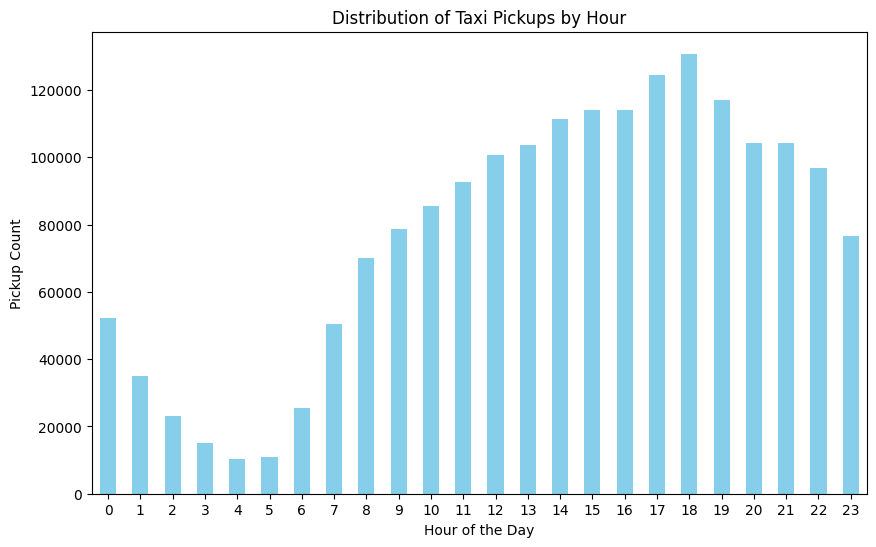

In [56]:
# Find and show the hourly trends in taxi pickups

# Plotting the distribution of taxi pickups by hour
plt.figure(figsize=(10, 6))
df['pickup_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickup Count')
plt.xticks(rotation=0)
plt.show()

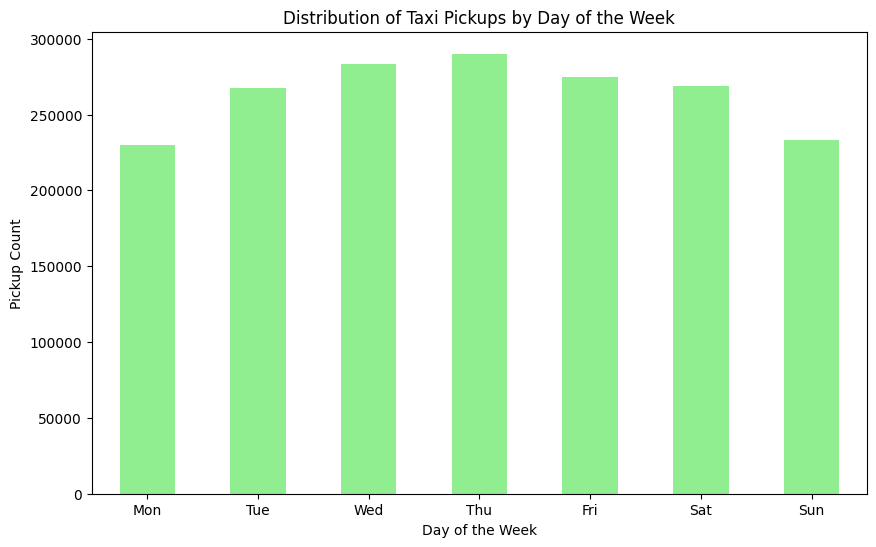

In [57]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of the week
df['pickup_week_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Plotting the distribution of taxi pickups by day of the week
plt.figure(figsize=(10, 6))
df['pickup_week_day'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pickup Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

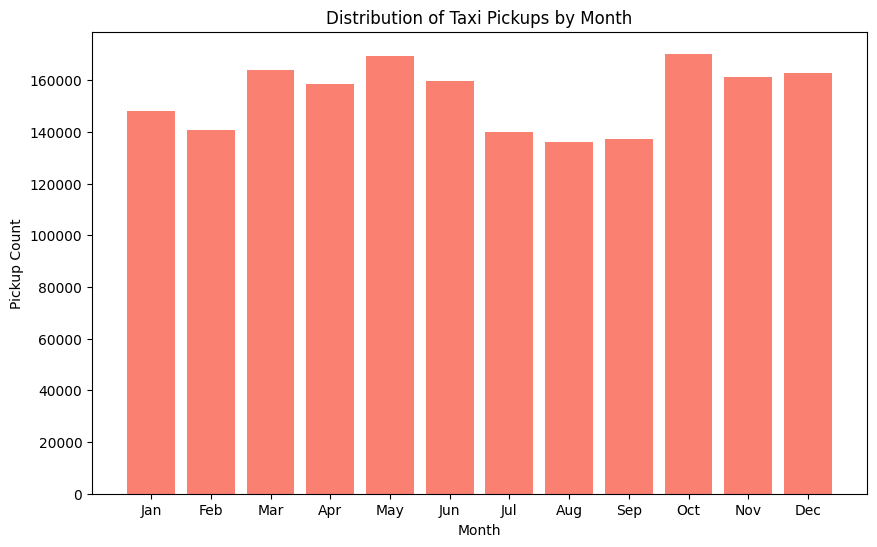

In [58]:
# Show the monthly trends in pickups
import calendar

# Extract month
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Plotting the distribution of taxi pickups by month
plt.figure(figsize=(10, 6))
monthly_counts = df['pickup_month'].value_counts().sort_index()
month_names = [calendar.month_abbr[i] for i in monthly_counts.index]

plt.bar(month_names, monthly_counts, color='salmon')
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Pickup Count')
plt.xticks(rotation=0)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [59]:
# Analyse the above parameters

df[['fare_amount', 'trip_distance', 'total_amount', 'tip_amount']].describe().round(2)

fare_amount  trip_distance  total_amount  tip_amount
count   1848034.00     1848034.00    1848034.00  1848034.00
mean         19.76           3.48         28.83        3.53
std          17.79           4.54         22.41        3.88
min           0.00           0.00          0.00        0.00
25%           9.30           1.07         16.00        1.00
50%          13.50           1.80         21.00        2.86
75%          21.90           3.44         30.80        4.42
max         728.90         204.10        762.45      103.84

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes, I think it’s a good idea to make a copy without the zero values. These zeros in fare, distance, or total amount are probably errors and can mess up the analysis. Using a copy instead of dropping rows from the original ensures to preserve the raw data for reference, auditing, or future analysis.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

If the pickup and drop are in the same zone, a zero distance could be legit like no-move cancellations. So, I wouldn’t blindly drop all zero-distance rows. Instead, 
- Keep rows with non-zero fare and total_amount (likely valid trips)
- Allow zero distance only if fare_amount > 0 (e.g., short same-zone trips) 

In [60]:
# Create a df with non zero entries for the selected parameters.

# Drops rows where fare_amount or total_amount is 0 (likely invalid).
# Keeps zero trip_distance only if the fare is positive, assuming it might be a valid short ride.

df_filtered = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    ((df['trip_distance'] > 0) | ((df['trip_distance'] == 0) & (df['fare_amount'] > 0)))
]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

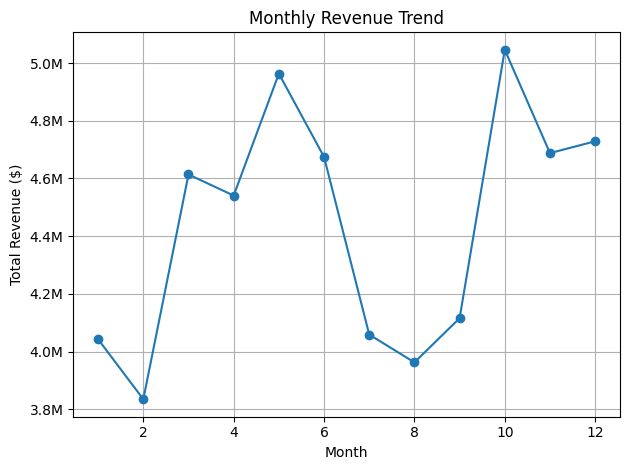

In [61]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_filtered.groupby('pickup_month')['total_amount'].sum().reset_index()
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o')
from matplotlib.ticker import FuncFormatter
# Custom y-axis formatting
million_formatter = FuncFormatter(lambda x, _: f'{x / 1000000}M')  # Format as thousands
plt.gca().yaxis.set_major_formatter(million_formatter)

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\2624487931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pickup_quarter'] = df_filtered['tpep_pickup_datetime'].dt.to_period('Q')


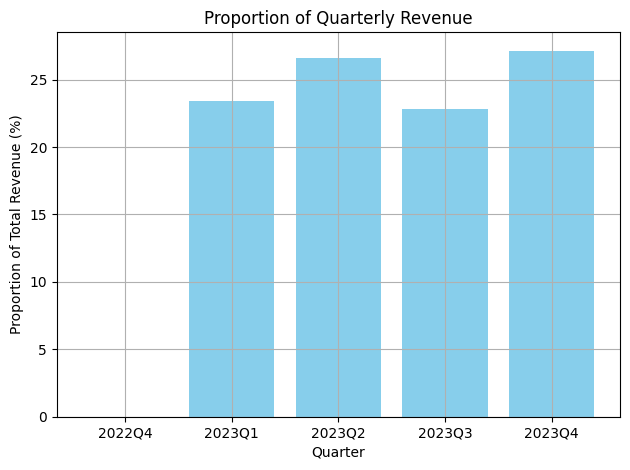

In [62]:
# Calculate proportion of each quarter

df_filtered['pickup_quarter'] = df_filtered['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum the total_amount
quarterly_revenue = df_filtered.groupby('pickup_quarter')['total_amount'].sum().reset_index()

# Calculate the proportion for each quarter
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue * 100

plt.bar(quarterly_revenue['pickup_quarter'].astype(str), quarterly_revenue['proportion'], color='skyblue')
plt.title('Proportion of Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

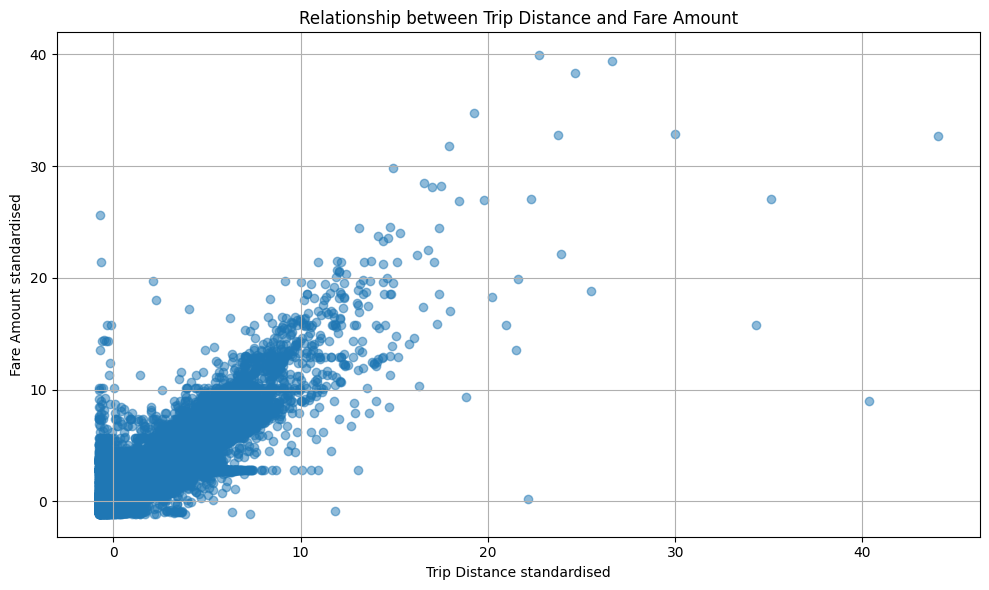

Correlation between Trip Distance and Fare Amount: 0.9508


In [63]:
# Show how trip fare is affected by distance

# standardise the columns for analysis
cols_for_standardisation = ['trip_distance', 'fare_amount']

# Filter out rows where trip_distance is 0
df_filtered_non_zero_distance = df_filtered[df_filtered['trip_distance'] > 0]
df_filtered_non_zero_distance_st = standardise_columns(df_filtered_non_zero_distance, cols_for_standardisation)

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_non_zero_distance_st['trip_distance'], df_filtered_non_zero_distance_st['fare_amount'], alpha=0.5)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance standardised')
plt.ylabel('Fare Amount standardised')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_filtered_non_zero_distance_st['trip_distance'].corr(df_filtered_non_zero_distance_st['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

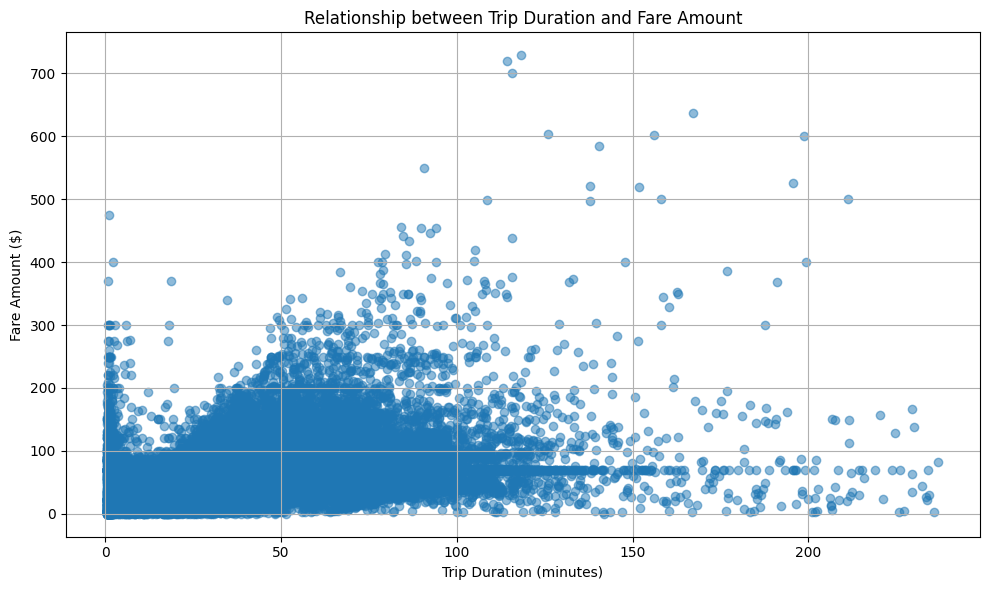

Correlation between Trip Duration and Fare Amount: 0.8423


In [64]:
# Show relationship between fare and trip duration

df_filtered_non_zero_duration = df_filtered[df_filtered['trip_duration_minutes'] > 0]
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_non_zero_duration['trip_duration_minutes'], df_filtered_non_zero_duration['fare_amount'], alpha=0.5)
plt.title('Relationship between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between trip_duration_minutes and fare_amount
correlation = df_filtered_non_zero_duration['trip_duration_minutes'].corr(df_filtered_non_zero_duration['fare_amount'])
print(f"Correlation between Trip Duration and Fare Amount: {correlation:.4f}")

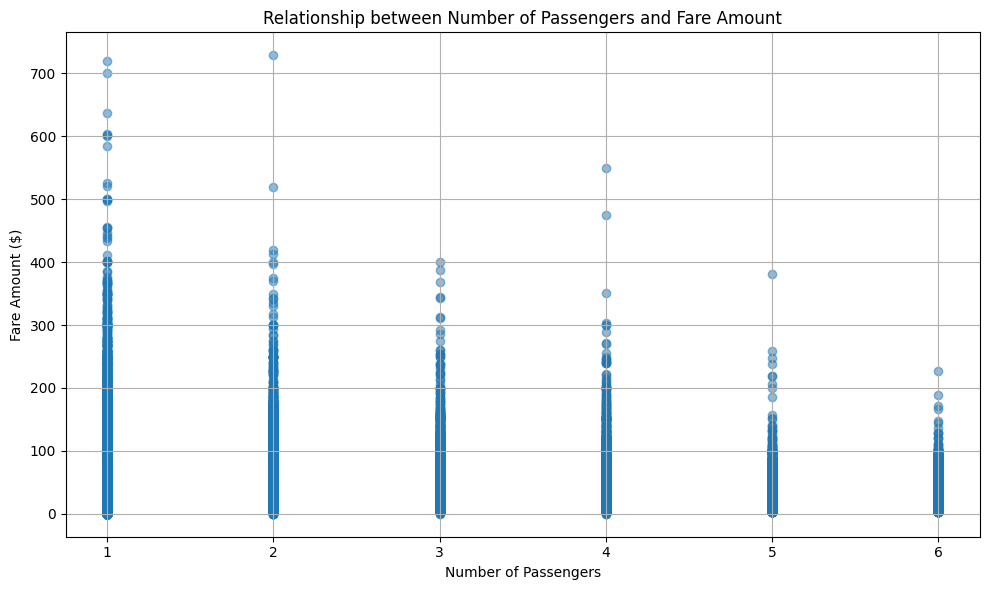

Correlation between Number of Passengers and Fare Amount: 0.0385


In [65]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['passenger_count'], df_filtered['fare_amount'], alpha=0.5)
plt.title('Relationship between Number of Passengers and Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between passenger_count and fare_amount
correlation = df_filtered['passenger_count'].corr(df_filtered['fare_amount'])
print(f"Correlation between Number of Passengers and Fare Amount: {correlation:.4f}")



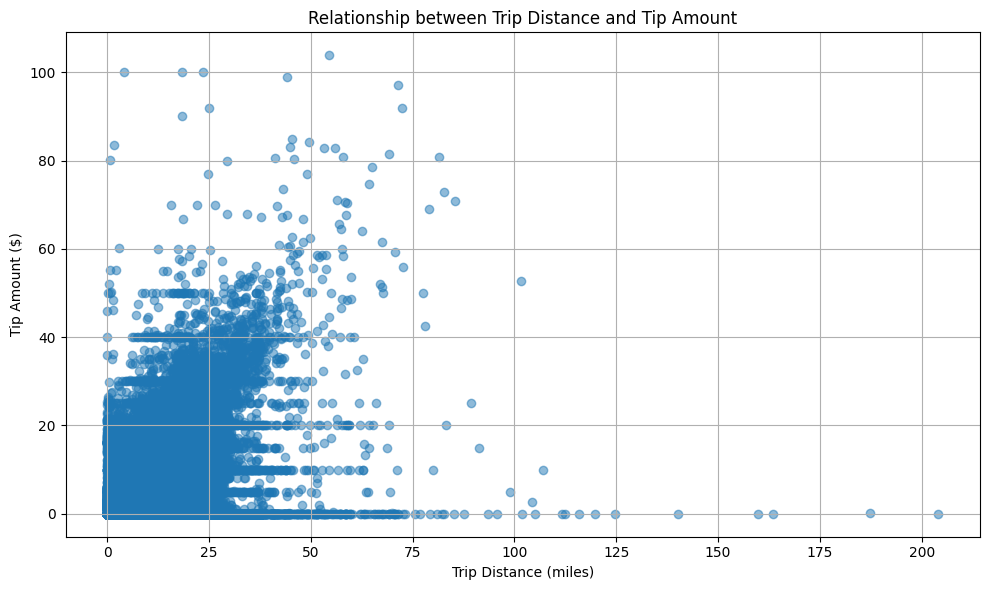

In [66]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_non_zero_distance['trip_distance'], df_filtered_non_zero_distance['tip_amount'], alpha=0.5)
plt.title('Relationship between Trip Distance and Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between trip_distance and tip_amount
correlation = df_filtered_non_zero_distance['trip_distance'].corr(df_filtered_non_zero_distance['tip_amount'])



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

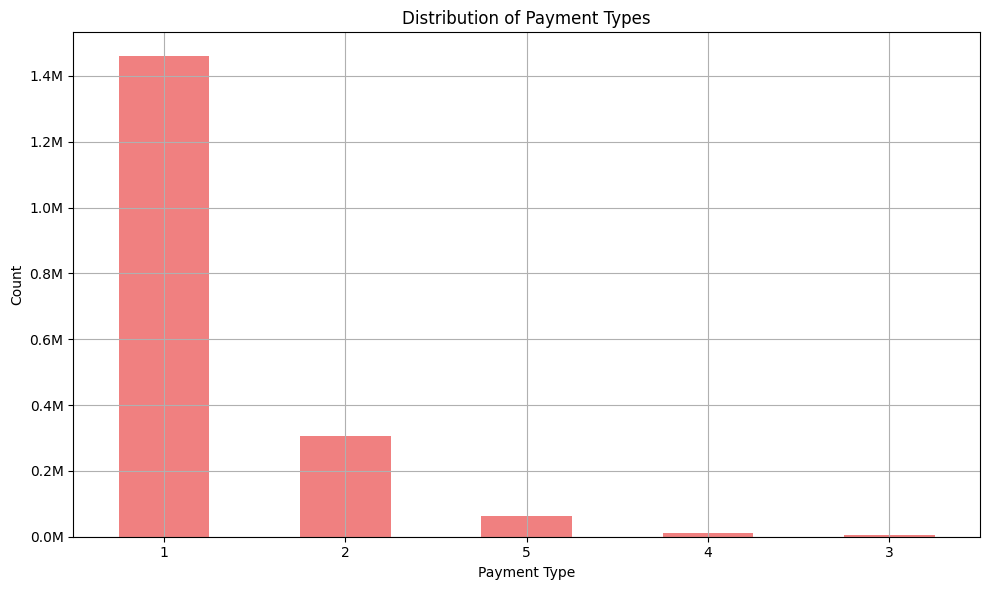

In [67]:
# Analyse the distribution of different payment types (payment_type).
# Plot the distribution of payment types
plt.figure(figsize=(10, 6))
df_filtered['payment_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.gca().yaxis.set_major_formatter(million_formatter)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [68]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [69]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

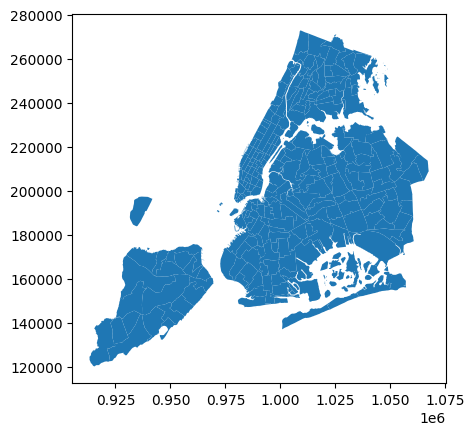

In [70]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [71]:
# Merge zones and trip records using locationID and PULocationID

merged_df = df_filtered.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           7.74         1.0           138           256             2   
2           1.24         1.0           161           237             1   
3           1.44         1.0           237           141             2   
4           0.54         1.0           143           142             2   

   fare_amount  ...  pickup_week_day  pickup_month  pickup_quarter  OBJECTID  \
0          6.5  ...                5            12          2022Q4     141.0   
1         32.4  ...                6             1          2023Q1     138.0   
2          7.9  ...                6             1          2023Q1     161.0   
3         11.4  ...                6             1          2023Q1     237.0   
4          6.5  ...                6             1          2023Q1     143.0   

   Shape_Leng  Shape_Area                   zone LocationID    borough  \
0    0.041514    0.000077        Lenox Hill West      141.0  Manhattan   
1    0.107467    0.000537      LaGuardia Airport      138.0     Queens   
2    0.035804    0.000072         Midtown Center      161.0  Manhattan   
3    0.042213    0.000096  Upper East Side South      237.0  Manhattan   
4    0.054180    0.000151    Lincoln Square West      143.0  Manhattan   

                                            geometry  
0  POLYGON ((994839.073 216123.698, 994786.74 216...  
1  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
2  POLYGON ((991081.026 214453.698, 990952.644 21...  
3  POLYGON ((993633.442 216961.016, 993507.232 21...  
4  POLYGON ((989338.1 223572.253, 989368.225 2235...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [72]:
# Group data by location and calculate the number of trips

trip_counts = merged_df.groupby('LocationID').size().reset_index(name='trip_count')

trip_counts.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LocationID  255 non-null    float64
 1   trip_count  255 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [73]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trip_counts, on='LocationID', how='left')


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

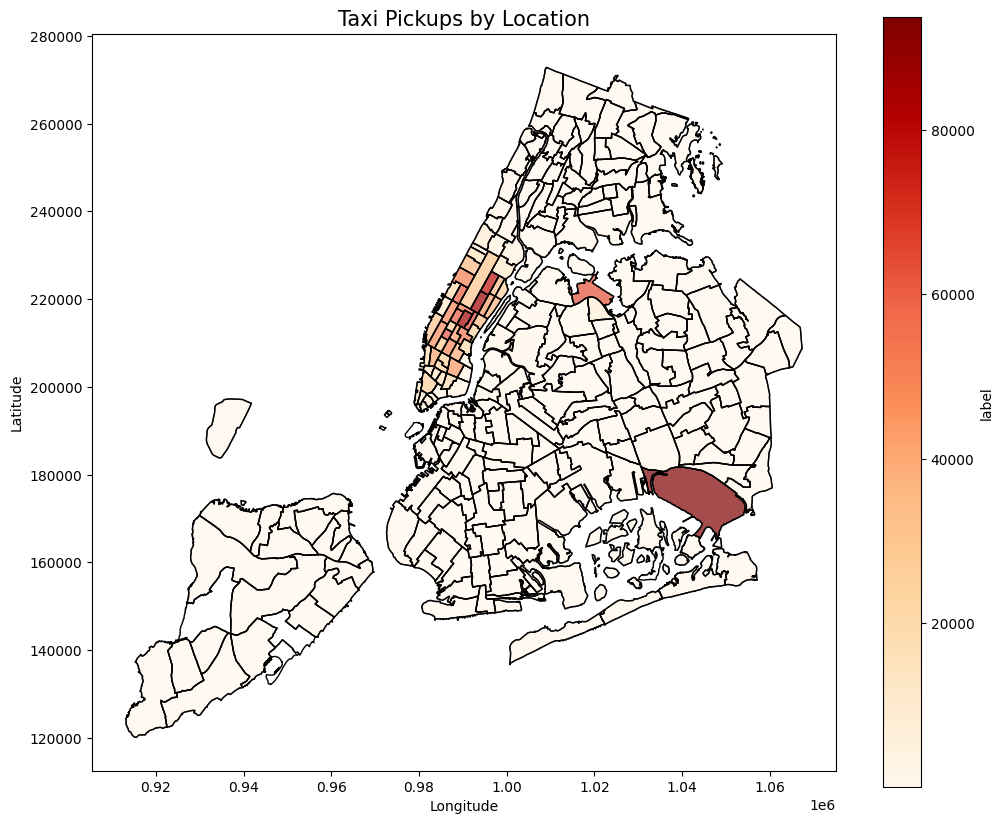

In [74]:
# Define figure and axis 
fig, ax = plt.subplots(1, 1, figsize=(12, 10)) 
# Set the title of the plot
ax.set_title('Taxi Pickups by Location', fontsize=15)


# Plot the map and display it
# Plot the zones with trip counts
zones.boundary.plot(ax=ax, linewidth=1, color='black')
# Plot the zones with trip counts using a color map
zones.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    alpha=0.7,
    edgecolor='black',
    legend_kwds = {'label': "label", 'orientation': "vertical"}
)
# Set the axis title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Set the title of the plot
ax.set_title('Taxi Pickups by Location', fontsize=15)
# Show the plot
plt.show()


In [75]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted.head(10)



OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
141       142    0.038176    0.000076           Lincoln Square East   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     trip_count  
131     93714.0  
236     86719.0  
160     85657.0  
235     77984.0  
161     65287.0  
137     63211.0  
185     62802.0  
141     61284.0  
229     61182.0  
169     54644.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\1061007342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trip_speed_mph'] = (df_filtered['trip_distance'] / df_filtered['trip_duration_minutes']) * 60


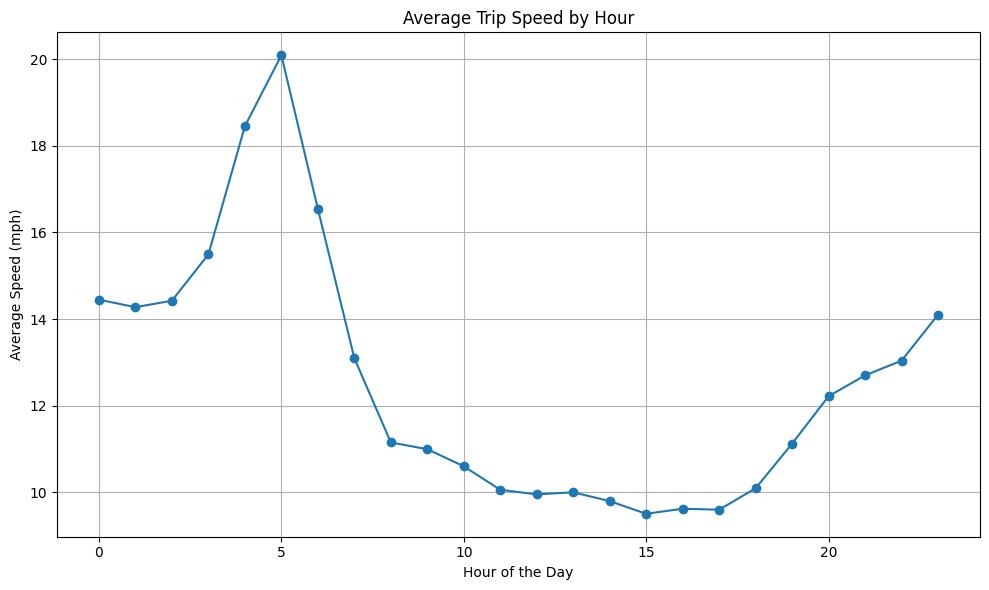

Slowest average speed at hour: 15.0 with speed: 9.50 mph


In [76]:
# Find routes which have the slowest speeds at different times of the day
# Create a new column for trip speed in mph
df_filtered['trip_speed_mph'] = (df_filtered['trip_distance'] / df_filtered['trip_duration_minutes']) * 60

# Group by hour and calculate average speed
avg_speed_by_hour = df_filtered.groupby('pickup_hour')['trip_speed_mph'].mean().reset_index()

# Plotting the average speed by hour
plt.figure(figsize=(10, 6))
plt.plot(avg_speed_by_hour['pickup_hour'], avg_speed_by_hour['trip_speed_mph'], marker='o')
plt.title('Average Trip Speed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (mph)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the hour with the slowest average speed
slowest_hour = avg_speed_by_hour.loc[avg_speed_by_hour['trip_speed_mph'].idxmin()]
print(f"Slowest average speed at hour: {slowest_hour['pickup_hour']} with speed: {slowest_hour['trip_speed_mph']:.2f} mph")




How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

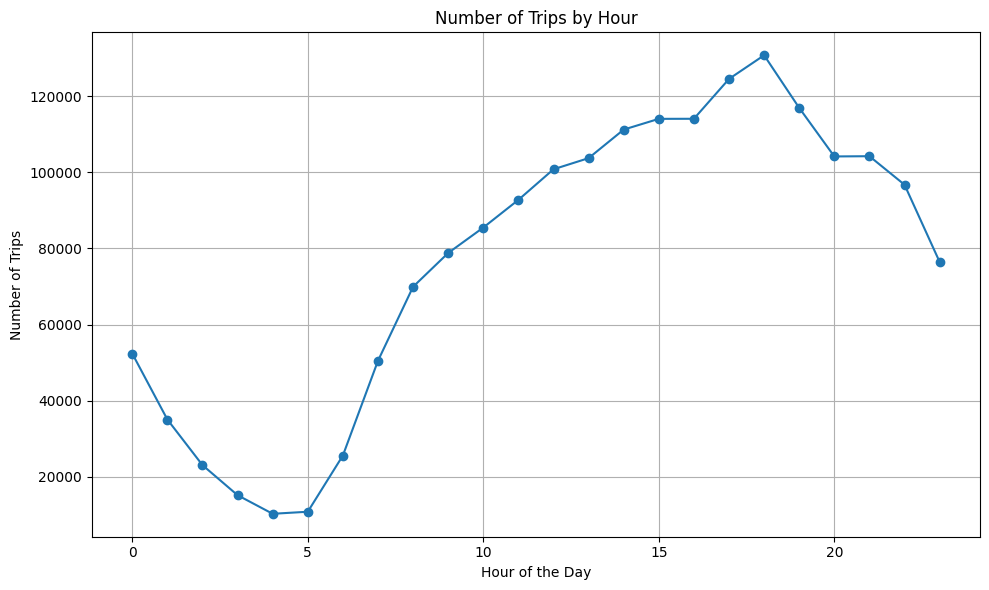

Busiest hour: 18 with 130797 trips


In [77]:
# Visualise the number of trips per hour and find the busiest hour
# Group by hour and count the number of trips
trips_by_hour = df_filtered.groupby('pickup_hour').size().reset_index(name='trip_count')

# Plotting the number of trips by hour
plt.figure(figsize=(10, 6))
plt.plot(trips_by_hour['pickup_hour'], trips_by_hour['trip_count'], marker='o')
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the hour with the most trips
busiest_hour = trips_by_hour.loc[trips_by_hour['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [78]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Find the actual number of trips in the five busiest hours
busiest_hours = trips_by_hour.nlargest(5, 'trip_count')
print(busiest_hours)
# Calculate the scaling factor
scaling_factor = 1 / 0.05  # Assuming we sampled 5% of the data
# Scale up the number of trips
scaled_up_trips = busiest_hours['trip_count'] * scaling_factor
print(scaled_up_trips)

# Find the hour with the most trips
busiest_hour = busiest_hours.loc[busiest_hours['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips")


    pickup_hour  trip_count
18           18      130797
17           17      124576
19           19      116958
16           16      114098
15           15      114079
18    2615940.0
17    2491520.0
19    2339160.0
16    2281960.0
15    2281580.0
Name: trip_count, dtype: float64
Busiest hour: 18 with 130797 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

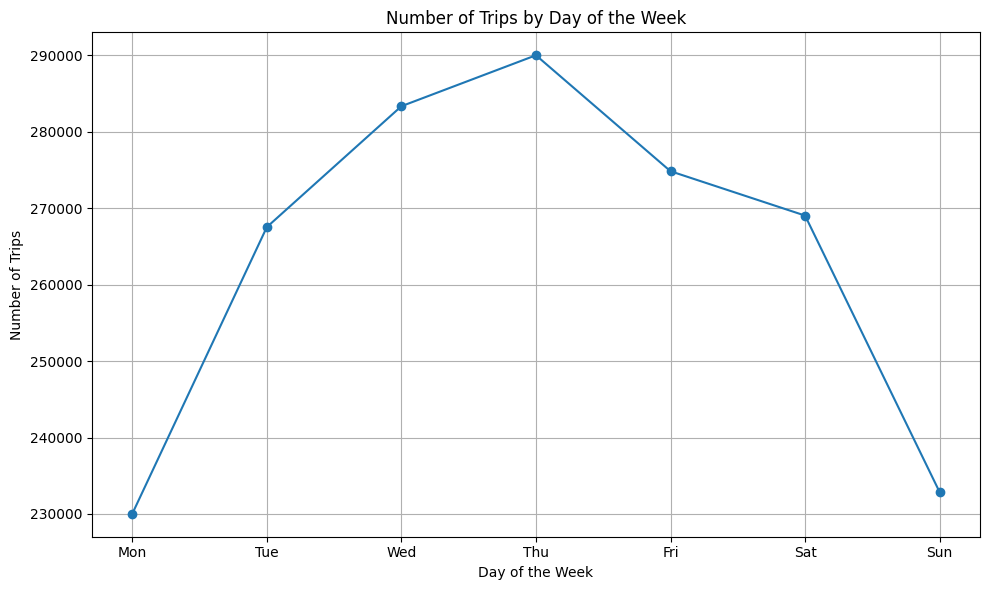

In [79]:
# Compare traffic trends for the week days and weekends

# Group by day of the week and count the number of trips
trips_by_week_day = df_filtered.groupby('pickup_week_day').size().reset_index(name='trip_count')
# Plotting the number of trips by day of the week
plt.figure(figsize=(10, 6))
plt.plot(trips_by_week_day['pickup_week_day'], trips_by_week_day['trip_count'], marker='o')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

After infering we can find what hours are busiest and require more availability of taxis. Knowing this helps optimize driver shifts, reduce wait times, and improve fleet distribution during peak demand

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

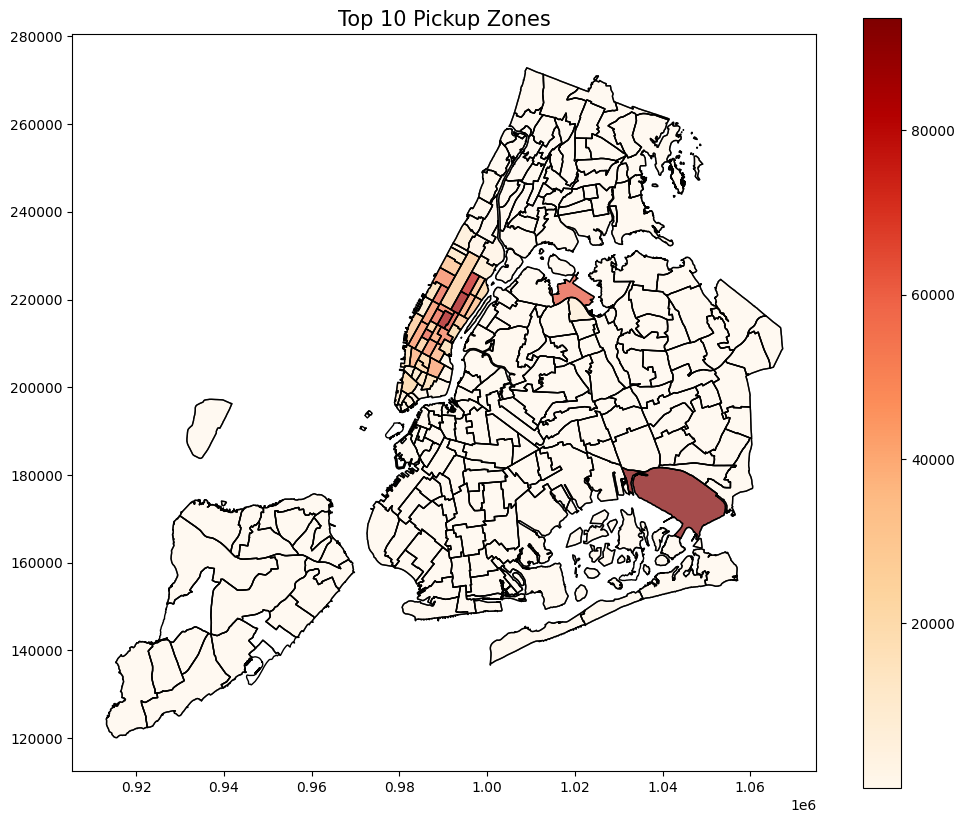

131                     JFK Airport
236           Upper East Side South
160                  Midtown Center
235           Upper East Side North
161                    Midtown East
137               LaGuardia Airport
185    Penn Station/Madison Sq West
141             Lincoln Square East
229       Times Sq/Theatre District
169                     Murray Hill
Name: zone, dtype: object

In [80]:
# Find top 10 pickup and dropoff zones

# Group by pickup and dropoff locations and count the number of trips
pickup_counts = df_filtered.groupby('PULocationID').size().reset_index(name='pickup_count')

# Merge the counts back to the zones GeoDataFrame
pickup_zones = zones.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Find the top 10 pickup zones
top_pickup_zones = pickup_zones.nlargest(10, 'pickup_count')

# Plotting the top pickup zones
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_title('Top 10 Pickup Zones', fontsize=15)
pickup_zones.boundary.plot(ax=ax, linewidth=1, color='black')
pickup_zones.plot(column='pickup_count', ax=ax, legend=True, cmap='OrRd', alpha=0.7, edgecolor='black')
plt.show()

top_pickup_zones['zone'].head(10)




**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [81]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_filtered['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']
dropoff_counts = df_filtered['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge the pickup and dropoff counts
pickup_dropoff_counts = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)
pickup_dropoff_counts['pickup_count'] = pickup_dropoff_counts['pickup_count'].astype(int)
pickup_dropoff_counts['dropoff_count'] = pickup_dropoff_counts['dropoff_count'].astype(int)
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['dropoff_count']
pickup_dropoff_counts['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the pickup_dropoff_ratio column
pickup_dropoff_counts.dropna(subset=['pickup_dropoff_ratio'], inplace=True)
pickup_dropoff_counts.sort_values(by='pickup_dropoff_ratio', ascending=False, inplace=True)
pickup_dropoff_counts.reset_index(drop=True, inplace=True)
pickup_dropoff_counts.head(10), pickup_dropoff_counts.tail(10)



C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\1978402072.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pickup_dropoff_counts['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


(   LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
 0          70          8095            870              9.304598
 1         132         93714          20484              4.574985
 2         138         63211          23744              2.662188
 3         186         62802          40299              1.558401
 4         114         24602          17826              1.380119
 5          43         30495          22320              1.366263
 6         249         41084          30793              1.334199
 7         162         65287          52465              1.244391
 8         100         30155          25299              1.191944
 9         161         85657          72044              1.188954,
      LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
 250         111             1             18              0.055556
 251          27             2             38              0.052632
 252         257            35            788              0.044416
 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [82]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter the data for night hours (11pm to 5am)

night_hours = df_filtered[(df_filtered['pickup_hour'] >= 23) | (df_filtered['pickup_hour'] <= 5)]

# Find the top 10 pickup zones during night hours
top_night_pickup_zones = night_hours['PULocationID'].value_counts().nlargest(10).reset_index()
top_night_pickup_zones.columns = ['LocationID', 'pickup_count']

# Find the top 10 dropoff zones during night hours
top_night_dropoff_zones = night_hours['DOLocationID'].value_counts().nlargest(10).reset_index()
top_night_dropoff_zones.columns = ['LocationID', 'dropoff_count']

# Merge the top night pickup and dropoff zones
top_night_zones = top_night_pickup_zones.merge(top_night_dropoff_zones, on='LocationID', how='outer').fillna(0)
top_night_zones['pickup_count'] = top_night_zones['pickup_count'].astype(int)
top_night_zones['dropoff_count'] = top_night_zones['dropoff_count'].astype(int)
top_night_zones['pickup_dropoff_ratio'] = top_night_zones['pickup_count'] / top_night_zones['dropoff_count']
top_night_zones['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the pickup_dropoff_ratio column
top_night_zones.dropna(subset=['pickup_dropoff_ratio'], inplace=True)
top_night_zones.sort_values(by='pickup_dropoff_ratio', ascending=False, inplace=True)
top_night_zones.reset_index(drop=True, inplace=True)
top_night_zones.head(10), top_night_zones.tail(10)



C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\3243742026.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_night_zones['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


(   LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
 0         249         12887           4993              2.581013
 1          79         16101           8504              1.893344
 2         230          8314           4709              1.765555
 3          48         10621           7051              1.506311
 4          68          6254           5980              1.045819
 5         107             0           5824              0.000000
 6         141             0           5449              0.000000
 7         170             0           6342              0.000000
 8         239             0           4510              0.000000
 9         263             0           5178              0.000000,
    LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
 0         249         12887           4993              2.581013
 1          79         16101           8504              1.893344
 2         230          8314           4709              1.765555
 3       

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [83]:
# Find the revenue share for nighttime and daytime hours.
# Filter for night hours (11 PM to 5 AM)

night_hours = df_filtered[(df_filtered['pickup_hour'] >= 23) | (df_filtered['pickup_hour'] <= 5)]

# Calculate total revenue for night hours
night_revenue = night_hours['total_amount'].sum()

# Calculate total revenue for all hours
total_revenue = df_filtered['total_amount'].sum()

# Calculate revenue share for night hours
night_revenue_share = (night_revenue / total_revenue) * 100
print(f"Nighttime revenue share: {night_revenue_share:.2f}%")

# Calculate revenue share for daytime hours
day_hours = df_filtered[(df_filtered['pickup_hour'] >= 6) & (df_filtered['pickup_hour'] < 23)]
day_revenue = day_hours['total_amount'].sum()
day_revenue_share = (day_revenue / total_revenue) * 100
print(f"Daytime revenue share: {day_revenue_share:.2f}%")

# Calculate the ratio of nighttime to daytime revenue
night_day_revenue_ratio = night_revenue / day_revenue
print(f"Nighttime to daytime revenue ratio: {night_day_revenue_ratio:.2f}")


Nighttime revenue share: 12.27%
Daytime revenue share: 87.73%
Nighttime to daytime revenue ratio: 0.14


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\1339914102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])


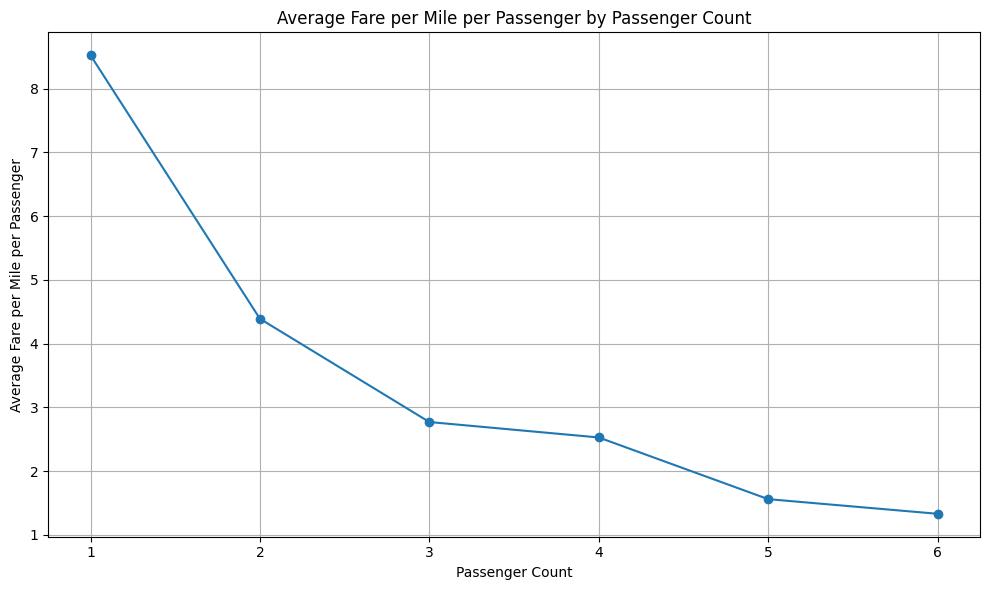

In [84]:
# For the different passenger counts, find the average fare per mile per passenger.
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile per passenger
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])
# Filter out rows with zero passenger count or trip distance
df_filtered_non_zero = df_filtered[(df_filtered['passenger_count'] > 0) & (df_filtered['trip_distance'] > 0)]

# Group by passenger count and calculate average fare per mile per passenger
avg_fare_per_mile_per_passenger = df_filtered_non_zero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Plotting the average fare per mile per passenger by passenger count
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_mile_per_passenger['passenger_count'], avg_fare_per_mile_per_passenger['fare_per_mile_per_passenger'], marker='o')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.grid(True)
plt.tight_layout()
plt.show()





**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

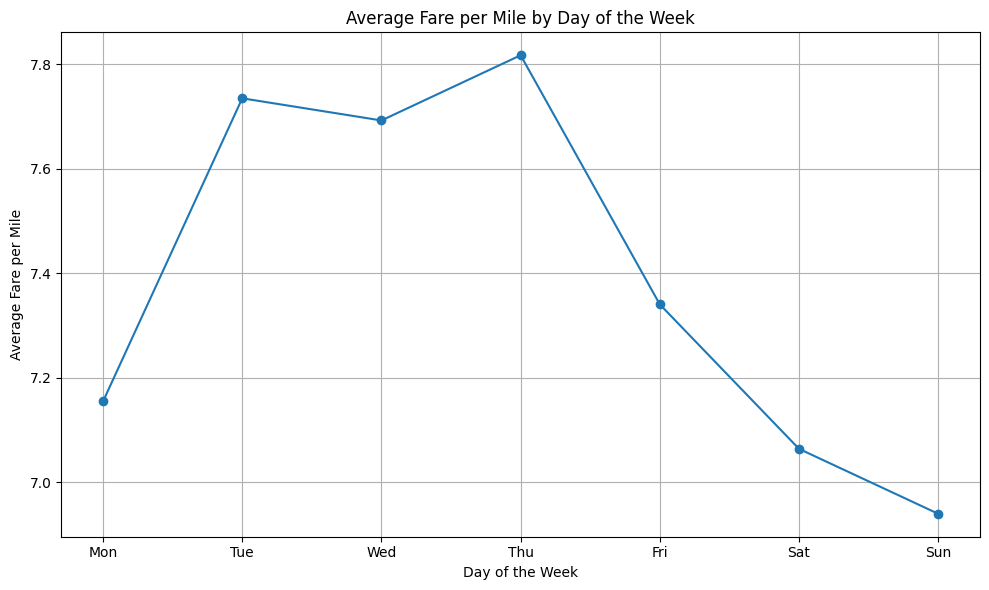

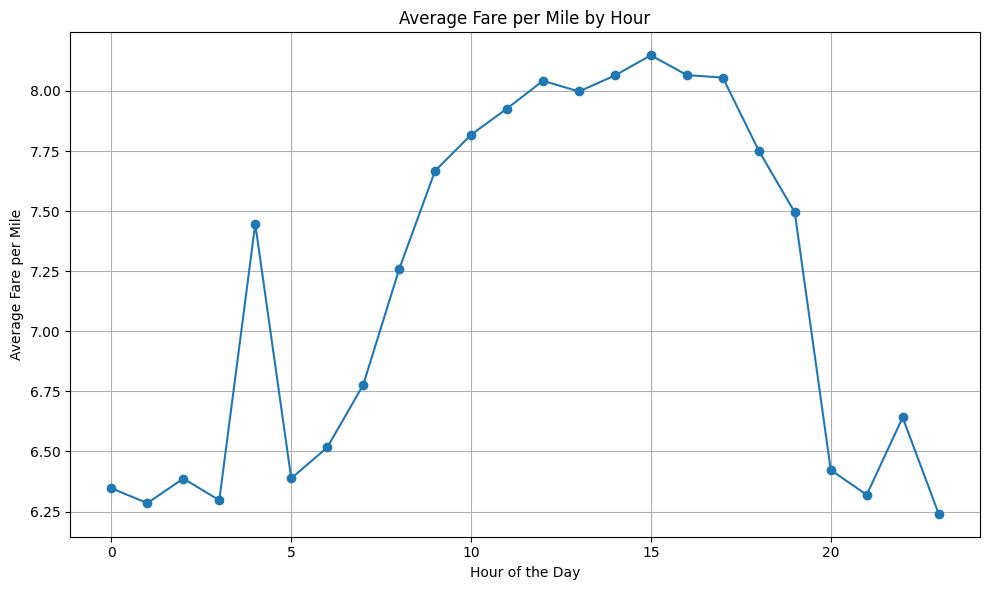

In [85]:
# Compare the average fare per mile for different days and for different times of the day

# Group by day of the week and calculate average fare per mile
avg_fare_per_mile_by_week_day = df_filtered_non_zero.groupby('pickup_week_day')['fare_per_mile_per_passenger'].mean().reset_index()

# Plotting the average fare per mile by day of the week
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_mile_by_week_day['pickup_week_day'], avg_fare_per_mile_by_week_day['fare_per_mile_per_passenger'], marker='o')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Group by hour and calculate average fare per mile
avg_fare_per_mile_by_hour = df_filtered_non_zero.groupby('pickup_hour')['fare_per_mile_per_passenger'].mean().reset_index()

# Plotting the average fare per mile by hour
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_mile_by_hour['pickup_hour'], avg_fare_per_mile_by_hour['fare_per_mile_per_passenger'], marker='o')
plt.title('Average Fare per Mile by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.grid(True)
plt.tight_layout()
plt.show()




**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

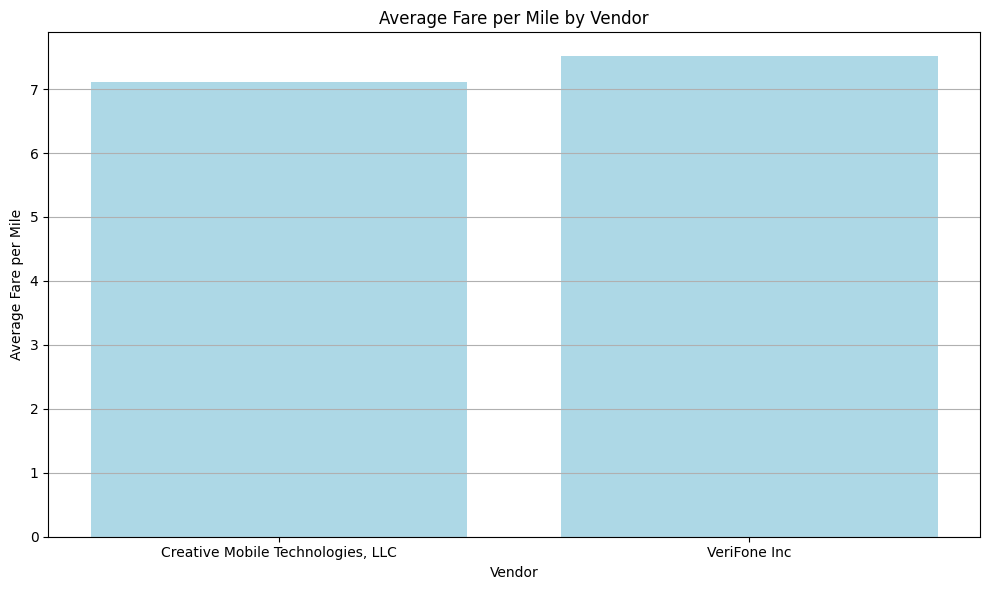

In [86]:
# Compare fare per mile for different vendors
# 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc

# Group by VendorID and calculate average fare per mile
avg_fare_per_mile_by_vendor = df_filtered_non_zero.groupby('VendorID')['fare_per_mile_per_passenger'].mean().reset_index()

# Map VendorID to vendor names
vendor_mapping = {
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc'
}
avg_fare_per_mile_by_vendor['Vendor'] = avg_fare_per_mile_by_vendor['VendorID'].map(vendor_mapping)
# Plotting the average fare per mile by vendor
plt.figure(figsize=(10, 6))
plt.bar(avg_fare_per_mile_by_vendor['Vendor'], avg_fare_per_mile_by_vendor['fare_per_mile_per_passenger'], color='lightblue')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\1074687657.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_non_zero['distance_tier'] = df_filtered_non_zero['trip_distance'].apply(distance_tier)


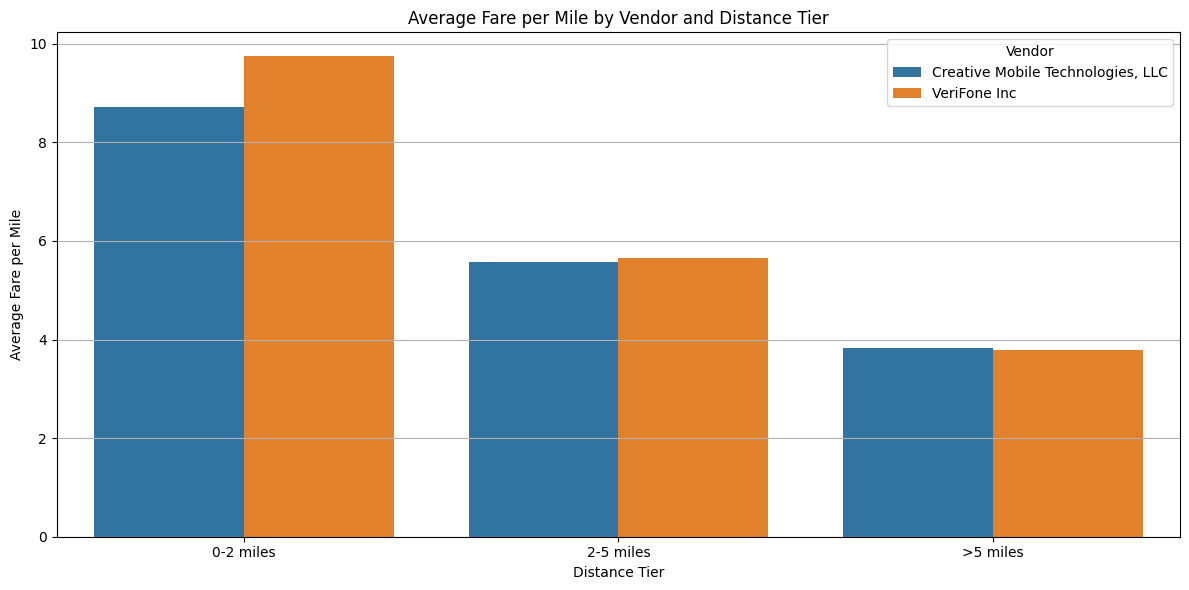

In [87]:
# Defining distance tiers
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'
    
# Apply the distance_tier function to create a new column
df_filtered_non_zero['distance_tier'] = df_filtered_non_zero['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier, and calculate average fare per mile
avg_fare_per_mile_by_vendor_distance = df_filtered_non_zero.groupby(['VendorID', 'distance_tier'])['fare_per_mile_per_passenger'].mean().reset_index()

avg_fare_per_mile_by_vendor_distance['Vendor'] = avg_fare_per_mile_by_vendor_distance['VendorID'].map(vendor_mapping)

# Plotting the average fare per mile by vendor and distance tier
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_fare_per_mile_by_vendor_distance, x='distance_tier', y='fare_per_mile_per_passenger', hue='Vendor')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title='Vendor')
plt.grid(axis='y')
plt.tight_layout()
plt.show()




##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

C:\Users\ejaza\AppData\Local\Temp\ipykernel_138736\3927575114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_non_zero['tip_percentage'] = (df_filtered_non_zero['tip_amount'] / df_filtered_non_zero['fare_amount']) * 100


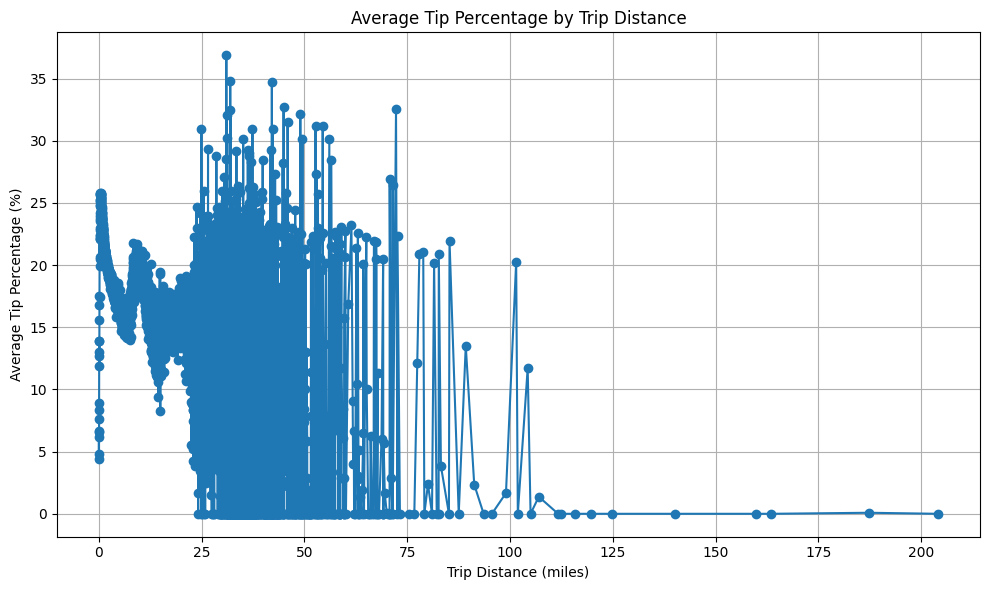

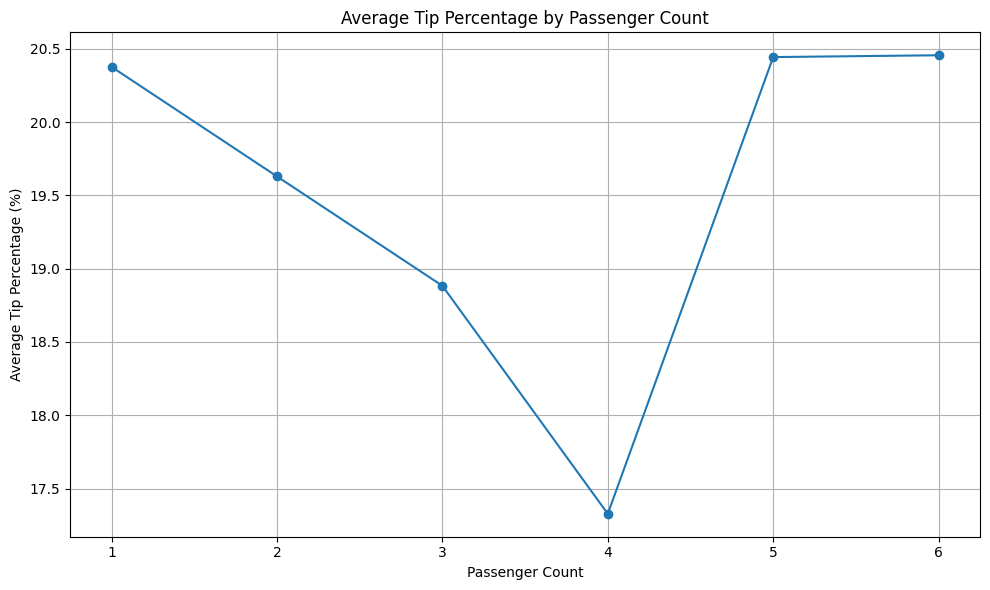

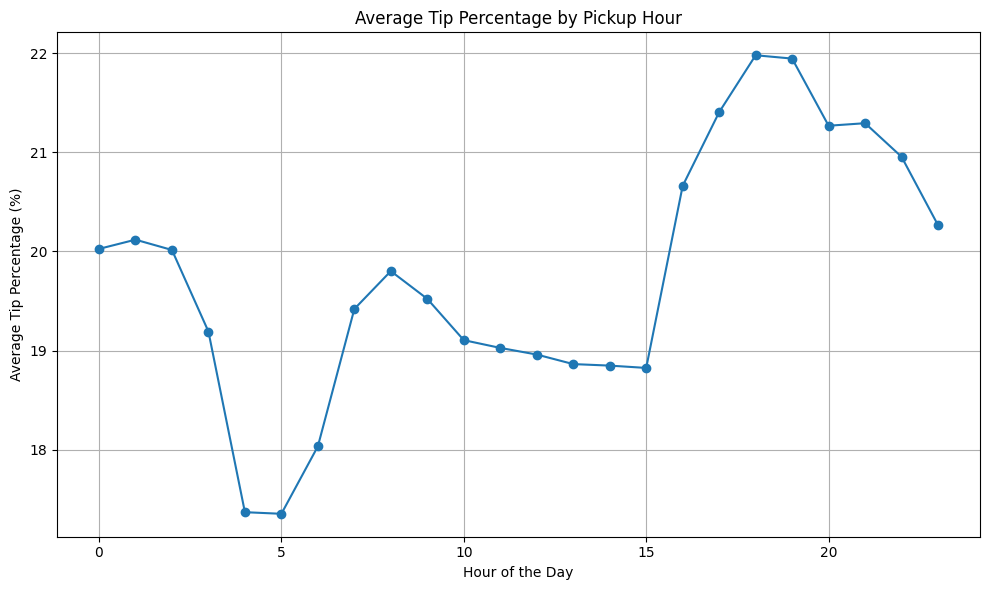

In [88]:
# Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?
# Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df_filtered_non_zero['tip_percentage'] = (df_filtered_non_zero['tip_amount'] / df_filtered_non_zero['fare_amount']) * 100

# Group by trip distance and calculate average tip percentage
avg_tip_percentage_by_distance = df_filtered_non_zero.groupby('trip_distance')['tip_percentage'].mean().reset_index()

# Plotting the average tip percentage by trip distance
plt.figure(figsize=(10, 6))
plt.plot(avg_tip_percentage_by_distance['trip_distance'], avg_tip_percentage_by_distance['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Group by passenger count and calculate average tip percentage
avg_tip_percentage_by_passenger_count = df_filtered_non_zero.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plotting the average tip percentage by passenger count
plt.figure(figsize=(10, 6))
plt.plot(avg_tip_percentage_by_passenger_count['passenger_count'], avg_tip_percentage_by_passenger_count['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Group by pickup hour and calculate average tip percentage
avg_tip_percentage_by_hour = df_filtered_non_zero.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plotting the average tip percentage by pickup hour
plt.figure(figsize=(10, 6))
plt.plot(avg_tip_percentage_by_hour['pickup_hour'], avg_tip_percentage_by_hour['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

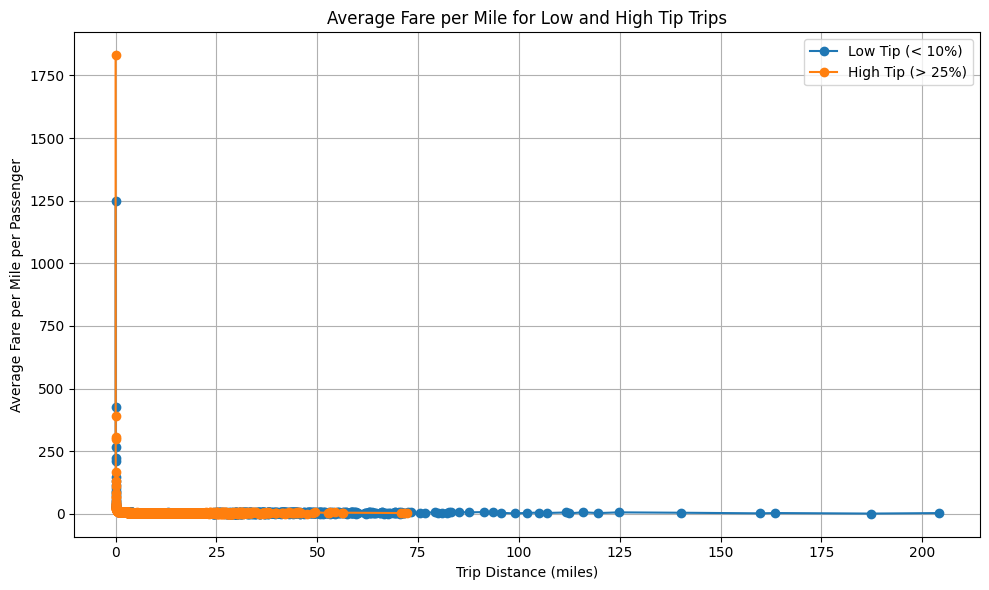

In [89]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter trips with tip percentage < 10%
low_tip_trips = df_filtered_non_zero[df_filtered_non_zero['tip_percentage'] < 10]

# Filter trips with tip percentage > 25%
high_tip_trips = df_filtered_non_zero[df_filtered_non_zero['tip_percentage'] > 25]

# Group by trip distance and calculate average fare per mile for low tip trips
avg_fare_per_mile_low_tip = low_tip_trips.groupby('trip_distance')['fare_per_mile_per_passenger'].mean().reset_index()

# Group by trip distance and calculate average fare per mile for high tip trips
avg_fare_per_mile_high_tip = high_tip_trips.groupby('trip_distance')['fare_per_mile_per_passenger'].mean().reset_index()

# Plotting the average fare per mile for low and high tip trips
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_mile_low_tip['trip_distance'], avg_fare_per_mile_low_tip['fare_per_mile_per_passenger'], marker='o', label='Low Tip (< 10%)')
plt.plot(avg_fare_per_mile_high_tip['trip_distance'], avg_fare_per_mile_high_tip['fare_per_mile_per_passenger'], marker='o', label='High Tip (> 25%)')
plt.title('Average Fare per Mile for Low and High Tip Trips')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Fare per Mile per Passenger')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

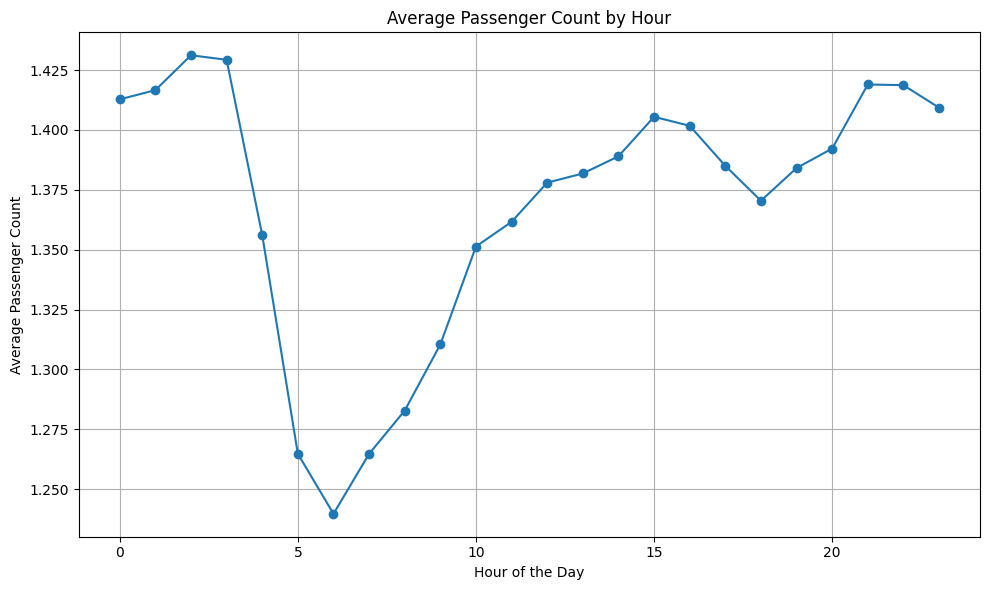

In [90]:
# See how passenger count varies across hours and days

# Group by hour and calculate average passenger count
avg_passenger_count_by_hour = df_filtered.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Plotting the average passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_count_by_hour['pickup_hour'], avg_passenger_count_by_hour['passenger_count'], marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()





**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [91]:
trip_counts.head()

LocationID  trip_count
0         1.0          50
1         2.0           2
2         3.0          41
3         4.0        2286
4         5.0          13

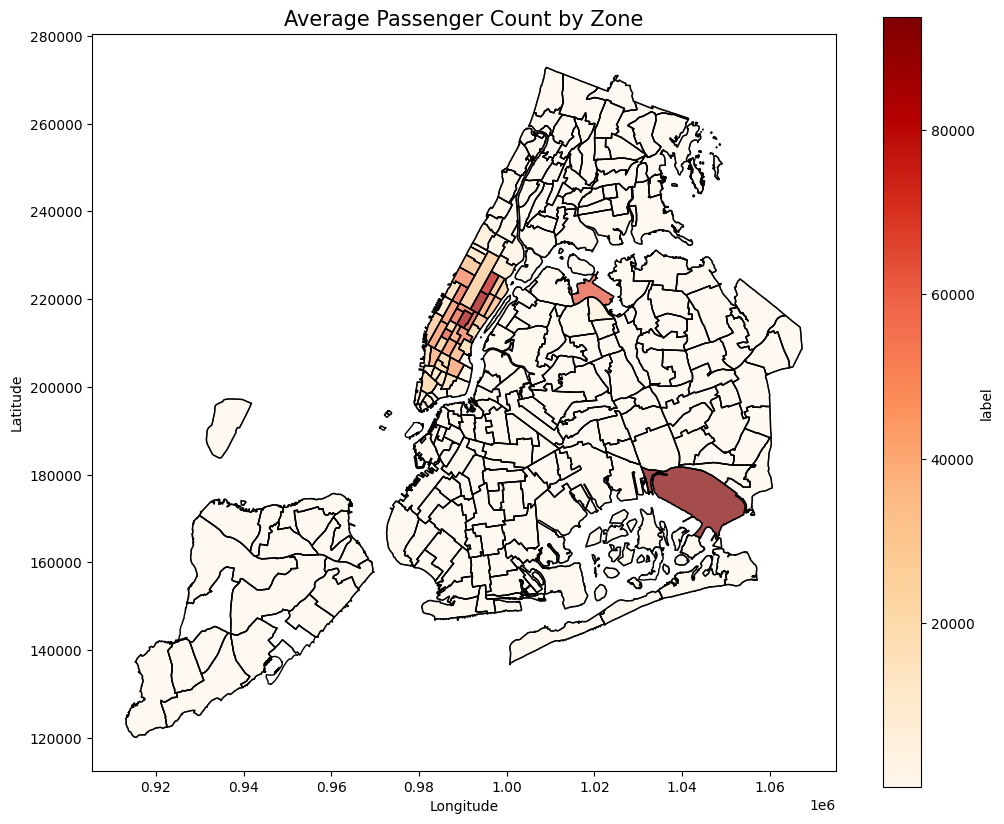

In [92]:
# How does passenger count vary across zones

# Group by PULocationID and calculate average passenger count
avg_passenger_count_by_zone = df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zones GeoDataFrame
avg_passenger_count_by_zone = avg_passenger_count_by_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Merge with trip counts
avg_passenger_count_by_zone = avg_passenger_count_by_zone.merge(trip_counts, left_on='PULocationID', right_on='LocationID', how='left')


# Plotting the average passenger count by zone
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_title('Average Passenger Count by Zone', fontsize=15)
# Plot the zones with average passenger count using a color map
zones.boundary.plot(ax=ax, linewidth=1, color='black')
zones.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    alpha=0.7,
    edgecolor='black',
    legend_kwds = {'label': "label", 'orientation': "vertical"}
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Average Passenger Count by Zone', fontsize=15)
plt.show()



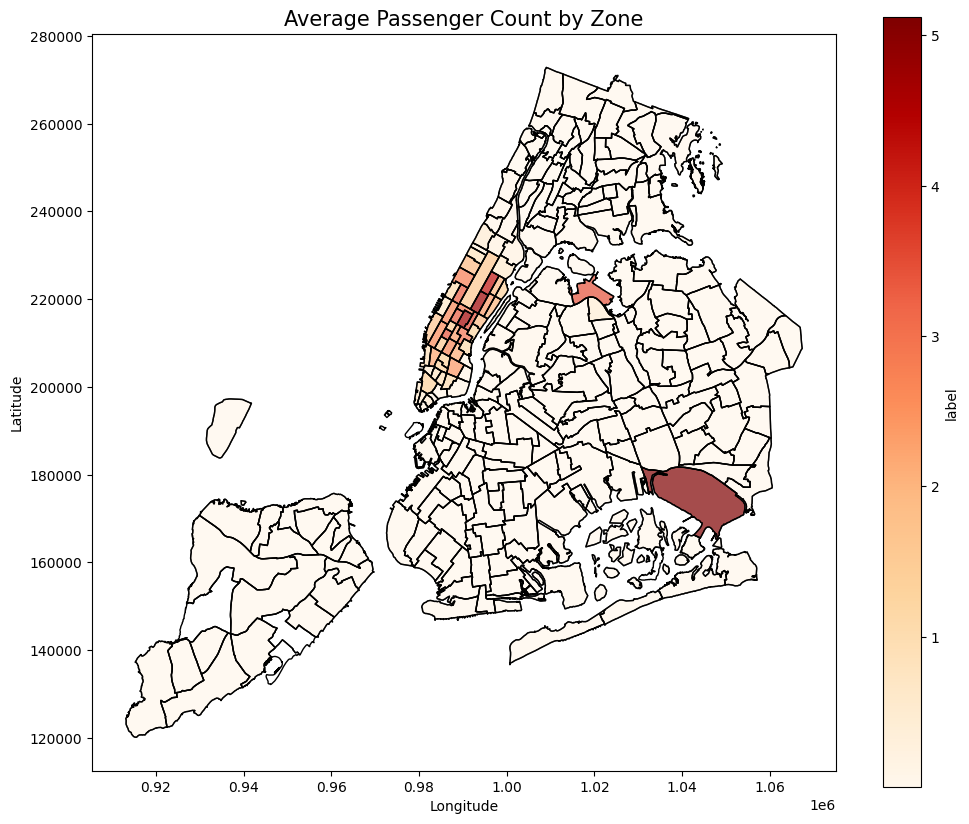

In [93]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones['avg_passenger_count'] = zones['trip_count'] / zones['trip_count'].sum() * 100

# Plotting the average passenger count by zone
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_title('Average Passenger Count by Zone', fontsize=15)
# Plot the zones with average passenger count using a color map
zones.boundary.plot(ax=ax, linewidth=1, color='black')
zones.plot(
    column='avg_passenger_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    alpha=0.7,
    edgecolor='black',
    legend_kwds = {'label': "label", 'orientation': "vertical"}
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Average Passenger Count by Zone', fontsize=15)
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [94]:
df_filtered['extra'].describe().round(2)

count    1847670.00
mean           1.57
std            1.82
min            0.00
25%            0.00
50%            1.00
75%            2.50
max           20.80
Name: extra, dtype: float64

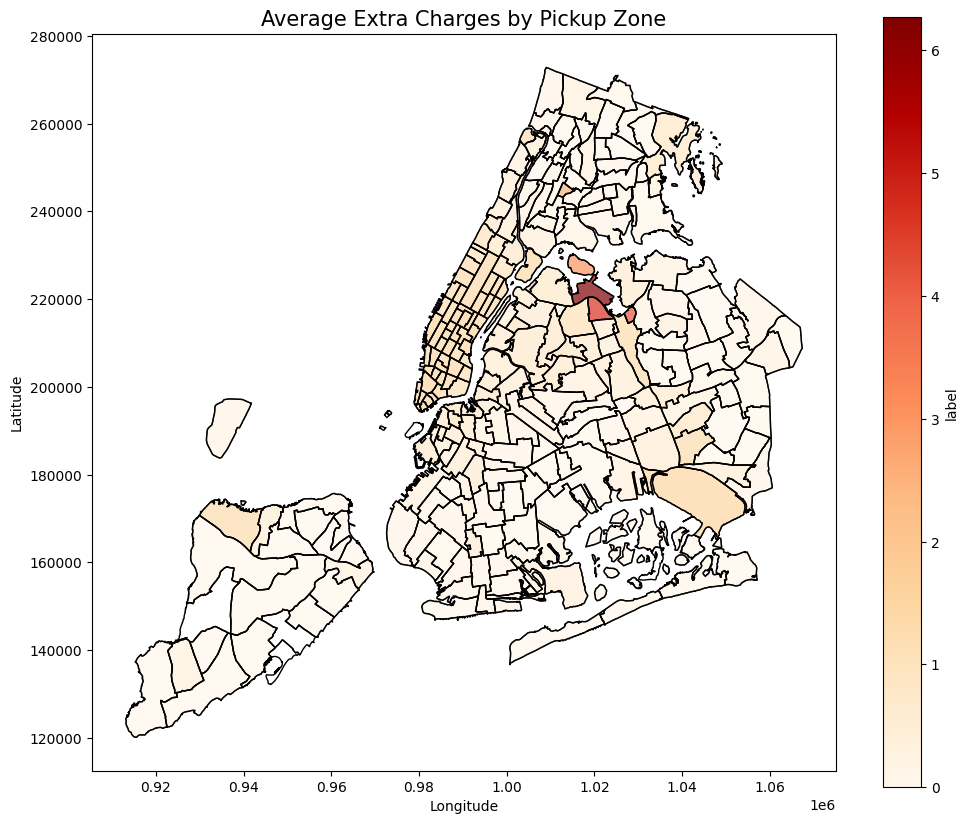

In [95]:
# Analyse the pickup/dropoff zones or times when extra charges are applied more frequently
# Group by PULocationID and calculate average extra charges
avg_extra_by_pickup_zone = df_filtered.groupby('PULocationID')['extra'].mean().reset_index()

# Merge extra into zones GeoDataFrame
zones = zones.merge(avg_extra_by_pickup_zone[['PULocationID', 'extra']], 
                    left_on='LocationID', right_on='PULocationID', 
                    how='left')
# Plotting the average extra charges by pickup zone
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_title('Average Extra Charges by Pickup Zone', fontsize=15)
# Plot the zones with average extra charges using a color map
zones.boundary.plot(ax=ax, linewidth=1, color='black')
zones.plot(
    column='extra',
    ax=ax,
    legend=True,
    cmap='OrRd',
    alpha=0.7,
    edgecolor='black',
    legend_kwds = {'label': "label", 'orientation': "vertical"}
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Average Extra Charges by Pickup Zone', fontsize=15)
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the analysis of trip duration, distance, and peak times, it is recommended to implement a dynamic routing system that adjusts based on real-time traffic conditions and historical demand data. This system should prioritize high-demand areas during peak hours, ensuring faster response times for customers. Additionally, integrating traffic prediction tools could help in avoiding congested areas, reducing the overall trip time and improving driver utilization.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

The analysis of trip trends across different hours, days, and months revealed distinct demand spikes in certain zones, particularly during evening rush hours and weekends. It is recommended to position cabs in high-demand areas based on historical data, particularly around transportation hubs, business districts, and areas with a higher concentration of tourists. By using predictive analytics, taxi services can dynamically deploy vehicles in real-time to zones showing increasing demand, thereby reducing customer wait times and increasing driver efficiency.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

By analyzing trip durations and demand fluctuations, we can propose tiered pricing that accounts for peak hours, weather conditions, and traffic congestion. A surge pricing model, adjusted for different times of the day and different zones, could ensure drivers are compensated fairly while also optimizing overall revenue. This approach should be balanced to remain competitive with other vendors in the market, ensuring that prices remain attractive to customers during non-peak hours while capitalizing on high-demand periods.